# Lab | Customer Analysis Round 3

For this lab, we still keep using the `marketing_customer_analysis.csv` file. You can find the file in the `files_for_lab` folder.

### Get the data

- Use the same jupyter file from the last lab, `Customer Analysis Round 3`

### EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:




In [7]:
import pandas as pd
data=pd.read_csv(r'C:\Users\Karo\Desktop\Ironhack\lab-customer-analysis-round-2\files_for_lab\csv_files/marketing_customer_analysis.csv')
data=data.drop(['Unnamed: 0'], axis=1)
data.columns = data.columns.str.lower()
data=data.rename(columns={'customer lifetime value':'customer_lifetime_value',
                         'effective to date':'effective_to_date',
                         'location code':'location_code',
                         'marital status':'marital_status',
                         'monthly premium auto':'monthly_premium_auto',
                         'months since last claim':'months_since_last_claim',
                         'months since policy inception':'months_since_policy_inception',
                          'number of open complaints':'number_of_open_complaints', 
                          'number of policies':'number_of_policies', 
                          'policy type':'policy_type',
                         'renew offer type':'renew_offer_type', 
                          'sales channel':'sales_channel', 
                          'total claim amount':'total_claim_amount',
                          'vehicle class':'vehicle_class', 
                          'vehicle size':'vehicle_size', 
                          'vehicle type':'vehicle_type'})
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'vehicle_type'],
      dtype='object')

In [8]:
data['state']=data['state'].fillna('California')
data['months_since_last_claim']=data['months_since_last_claim'].fillna('15.149')
data['vehicle_size']=data['vehicle_size'].fillna('Medsize')
data['vehicle_class']=data['vehicle_class'].fillna('Four-Door Car')
data=data.drop(['vehicle_type'], axis=1)
data['number_of_open_complaints']=data['number_of_open_complaints'].fillna('0.0')
data.isnull().sum()

customer                           0
state                              0
customer_lifetime_value            0
response                         631
coverage                           0
education                          0
effective_to_date                  0
employmentstatus                   0
gender                             0
income                             0
location_code                      0
marital_status                     0
monthly_premium_auto               0
months_since_last_claim            0
months_since_policy_inception      0
number_of_open_complaints          0
number_of_policies                 0
policy_type                        0
policy                             0
renew_offer_type                   0
sales_channel                      0
total_claim_amount                 0
vehicle_class                      0
vehicle_size                       0
dtype: int64

In [10]:
data['response'].value_counts()
data['response']=data['response'].fillna('No')

## 1. Show DataFrame info.


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10910 non-null  object 
 1   state                          10910 non-null  object 
 2   customer_lifetime_value        10910 non-null  float64
 3   response                       10910 non-null  object 
 4   coverage                       10910 non-null  object 
 5   education                      10910 non-null  object 
 6   effective_to_date              10910 non-null  object 
 7   employmentstatus               10910 non-null  object 
 8   gender                         10910 non-null  object 
 9   income                         10910 non-null  int64  
 10  location_code                  10910 non-null  object 
 11  marital_status                 10910 non-null  object 
 12  monthly_premium_auto           10910 non-null 

## 2. Describe DataFrame.


In [12]:
data.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,number_of_policies,total_claim_amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,8018.241094,37536.284785,93.196059,48.091934,2.979193,434.888330
std,6885.081434,30359.195670,34.442532,27.940675,2.399359,292.180556
min,1898.007675,0.000000,61.000000,0.000000,1.000000,0.099007
25%,4014.453113,0.000000,68.000000,24.000000,1.000000,271.082527
50%,5771.147235,33813.500000,83.000000,48.000000,2.000000,382.564630
75%,8992.779137,62250.750000,109.000000,71.000000,4.000000,547.200000
max,83325.381190,99981.000000,298.000000,99.000000,9.000000,2893.239678


## 3. Show a plot of the total number of responses.


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [14]:
pd.set_option('display.max_columns', None)

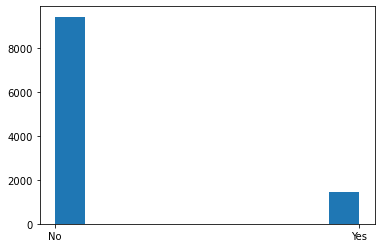

In [16]:
plt.hist(data['response'])
plt.show()

## 4. Show a plot of the response rate by the sales channel.


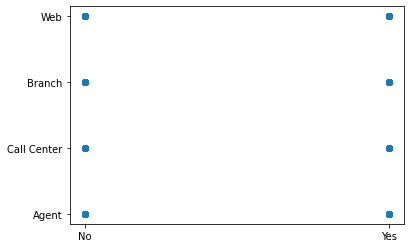

In [17]:
plt.scatter(data['response'], data['sales_channel'])
plt.show()

## 5. Show a plot of the response rate by the total claim amount.


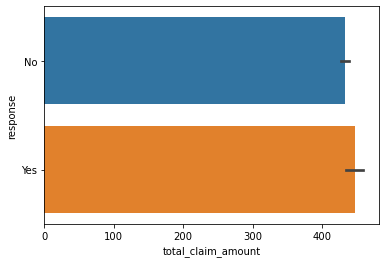

In [26]:
sns.barplot(y="response", x="total_claim_amount", data=data)
plt.show()

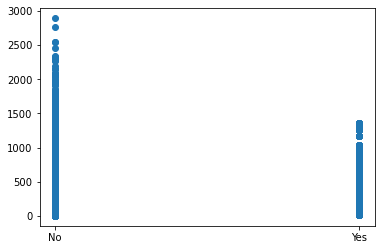

In [27]:
plt.scatter(data['response'], data['total_claim_amount'])
plt.show()

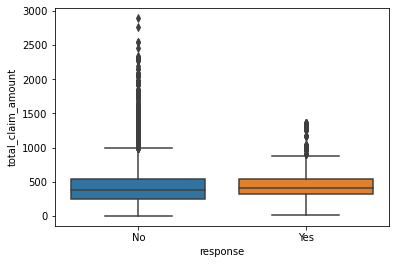

In [31]:
data1 = data[(data['response']=='Yes') | (data['response'] == 'No')]
sns.boxplot(x='response', y='total_claim_amount', data=data1)
plt.show()

## 6. Show a plot of the response rate by income.

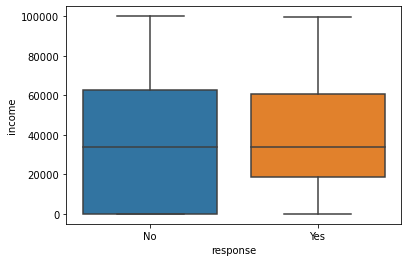

In [30]:
data1 = data[(data['response']=='Yes') | (data['response'] == 'No')]
sns.boxplot(x='response', y='income', data=data1)
plt.show()